<a href="https://www.kaggle.com/code/awesomeharris/a-b-testing-design-and-analysis-udacity?scriptVersionId=136532513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# A/B Test Experiment Overview

## Introduction
The online course provider, Udacity.com currently has two options on the course overview page: "Start Free Trial" and "Access Course Materials". 

**If a user clicks on "Start Free Trial" option**, he/she will be prompted to enter credit card information, and he/she will be enrolled in a Free Trial for 14 days for the paid version of the course, thereafter after 14 days the bill will be automatically charged unless it is cancelled first.

**If a user clicks on "Access Course Materials" option**, he/she will be able to view all the course materials and take quizes for free but will not be able to access support of coaching and obtain the course certificate at the end of course completion.

In the experiment, Udacity wants to add a **"free trial screener"** page after a user clicks on "Start Trial" option. On this page the user will first be answering whether how many hours planned to study per week. If less than 5 hours is chosen, then the screen will suggest the user to take the "Access Course Materials" option instead.

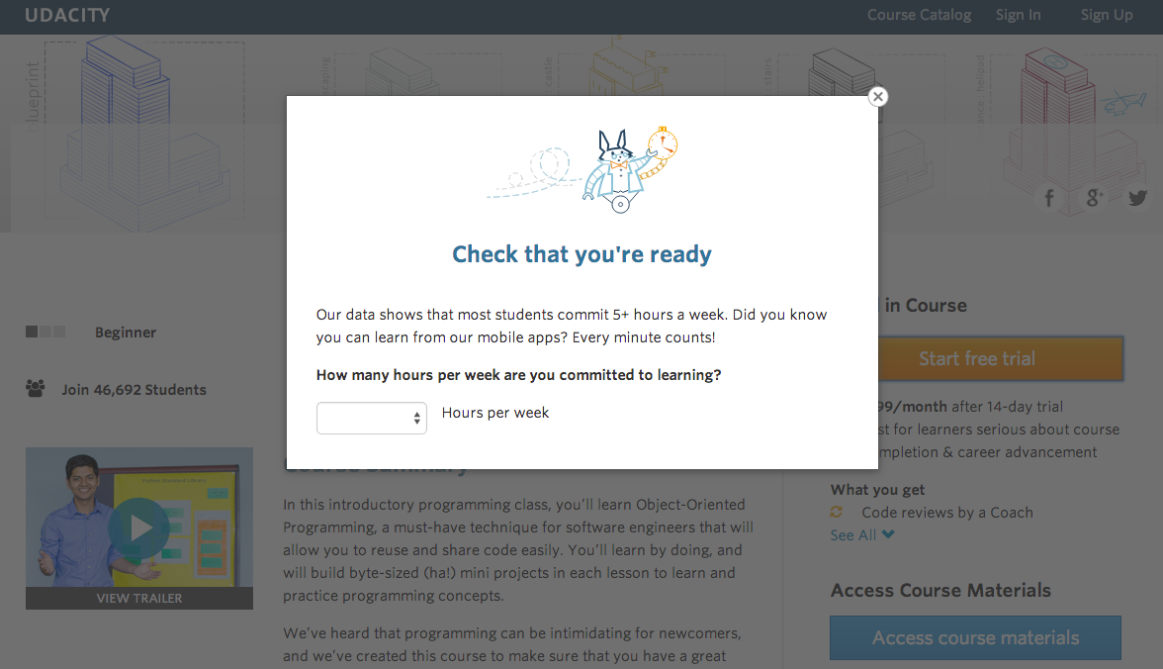

## Experiment Setup
**Objective**: To improve overall user experience and improve coaches' capacity to support students who are more likely to complete the course.

**Null Hypothesis, H0**: The "free trial screener" page will not have significant impact on overall user experience and will not be effective in reducing the early course cancellation.

**Alternative Hypothesis, H1**: The "free trial screener" page might reduce the amount of frustrated users who left the Free Trial because they did not have enough time per week, without significantly reducing the amount of users who continue past Free Trial and completing the course.

**Unit of Diversion**: The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not register, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

# Experiment Design
## Metric Choice

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.

The following are some of the common metrics to be considered:  
 (*dmin = minimum detectable effects*)
- **Number of cookies:** That is, number of unique cookies to view the course overview page. (dmin=3000)
- **Number of user-ids:** That is, number of users who enroll in the free trial. (dmin=50)
- **Number of clicks:** That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- **Click-through-probability:** That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- **Gross conversion:** That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- **Retention:** That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- **Net conversion:** That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" (dmin=0.0075)

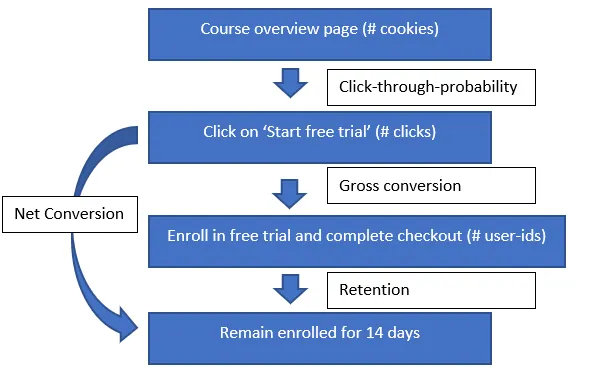

## Choosing Invariant Metrics
Invariant metrics are the ones used for sanity checks and will remain invariant throughout the experiment

In this experiment, the following are the invariant metrics chosen:
- **Number of cookies**
- **Number of clicks**

*Number of cookies* and *Number of clicks* are most likely be invariant throughout the experiment as they are events which happen before the experiment "free trial screener" is triggered.

## Choosing Evaluation Metrics
Evaluation metrics are the ones that we care about, the metrics that must be observed for consideration in the decision to launch the experiment.  
  
In this experiment, the following are the evaluation metrics chosen:
- **Retention**
- **Net conversion**

Interesting to note that although *Gross conversion* is a metric which covers event past the "free trial screener" but is not chosen here for evaluation because this metric covers up to signing up for Free Trial only, but does not guarantee that the users will continue past Free Trial.   

However, *Retention* and *Net conversion* are more relevant evaluation metrics to show user satisfaction by continuing past Free Trial.


* $ H_{0}: R_{treatment} = R_{control} $
* $ H_{1}: R_{treatment} \neq R_{control} $


* $ H_{0}: CN_{treatment} = CN_{control} $
* $ H_{1}: CN_{treatment} \neq CN_{control} $

## Measure Variability in Metrics

Collecting baseline data (provided by Udacity)

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
from scipy import stats
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
path = "/kaggle/input/udacity-free-trial-screener-model-analysis/"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
baseline = pd.read_csv(path+"Final Project Baseline Values.csv",header=None)\
           .set_index(0).rename_axis('Description')\
           .rename(columns={1:'Estimation'})
baseline["Metric"] = ["Number of cookies","Number of user-ids", "Number of clicks",
                      "Click-through-probability", "Gross conversion", "Retention",
                      "Net conversion"]
baseline

,Estimation,Metric
Description,,
Unique cookies to view course overview page per day:,40000.000000,Number of cookies
"Unique cookies to click ""Start free trial"" per day:",3200.000000,Number of user-ids
Enrollments per day:,660.000000,Number of clicks
"Click-through-probability on ""Start free trial"":",0.080000,Click-through-probability
"Probability of enrolling, given click:",0.206250,Gross conversion
"Probability of payment, given enroll:",0.530000,Retention
"Probability of payment, given click",0.109313,Net conversion


## Calculate standard deviation of evaluation metrics
We need to calculate the standard deviation of the sampling distribution of the sample mean (standard error, in short) for each evaluation metric. The standard error is an estimate of how far the sample proportion is likely to be from the population proportion.
ier.

In [3]:
# Baseline metrics
n_sample = 5000 # Sample size of cookies visiting the course overview page
n_pageviews = 40000 # Unique cookies to view course overview page per day
n_clicks = 3200 # Unique cookies to click "Start free trial" per day
n_enroll = 660 # Enrollments per day:
ctp = 0.08 # Click-through-probability on "Start free trial"

$ SD = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ with $ \sqrt{\hat{p}*(1-\hat{p})}$ estimating the population standard deviation for binomial distribution.


In [4]:
# Calculate the standard deviation of evaluation metrics
# For Retention
N_retention = n_sample * (n_enroll / n_pageviews)
p_retention = 0.53
SD_retention = math.sqrt(p_retention*(1 - p_retention)/N_retention)
print(f"""
For Retention metric:
  N = {N_retention}
  p = {p_retention}
  SD = {SD_retention:.4f}""")

# For Net conversion
N_conversion = n_sample * ctp
p_netconversion = 0.109313
SD_netconversion = math.sqrt(p_netconversion*(1 - p_netconversion)/N_conversion)
print(f"""
For Net Conversion metric:
  N = {N_conversion}
  p = {p_netconversion}
  SD = {SD_netconversion:.4f}""")


For Retention metric:
  N = 82.5
  p = 0.53
  SD = 0.0549

For Net Conversion metric:
  N = 400.0
  p = 0.109313
  SD = 0.0156


**Notes**:  
- In the Retention calculations above, we are scaling down the respective evaluation metric sample size according to the sample size of cookies = 5000 given. The evaluation metric sample size needs to scale down to a factor of 5000 (sample) / 40000 (population/baseline) = 1/8, before calculating the standard deviation.
- There is no scaling down with Net Conversion metric because the underlying unit of diversion is different. Retention uses cookies (the unit given for sample size) while Net Conversion uses clicks. The sample size of Net Conversion is done through multiplying the sample size given by CTR.

## Determining Experiment Sample Size for A/B Testing (How many page views do you need?)
Approach A:  
If we assume that the standard deviations of the population proportion and the sample proportion are equal and that also the sample sizes of treatment and control group are the same, then the required experiment sample size per group can be determined through (as outlined [here](http://vanbelle.org/chapters%5Cwebchapter2.pdf)):

$ n = 2(z_{1-\alpha/2}+z_{1-\beta})^2*\frac{\sigma^2}{dmin^2} $

with $ \sigma = SE * \sqrt{n} = \sqrt{\hat{p}*(1-\hat{p})}$,whereby here n is the sample size we used to calculate SE earlier.

Approach B:  
If we do not assume common standard deviations then a more precise way to determine the required sample size would be (as outlined [here](http://vanbelle.org/chapters%5Cwebchapter2.pdf)):


$ n = \frac{(z_{1-\alpha/2}*\sqrt{2*\hat{p}*(1-\hat{p})}+z_{1-\beta}*\sqrt{\hat{p}*(1-\hat{p})+(\hat{p}+dmin)*(1-(\hat{p}+dmin))})^2}{dmin^2}$

This is also the approach used by many online sample size calculators such as the one by [Evan Miller ](https://www.evanmiller.org/ab-testing/sample-size.html) and we will apply it in the following.  

**Some notes:**  
Minimum detectable effect (MDE) (dmin) is a calculation that estimates the smallest improvement you are willing to be able to detect. It determines how "sensitive" an experiment is. Use MDE to estimate how long an experiment will take given the following: Baseline conversion rate.


In [5]:
alpha = 0.05
beta = 0.2
statistical_power = (1 - beta)

In [6]:
def get_sampleSize(alpha, beta, p, dmin):
    '''Return sample size given alpha, beta, p and dmin'''
    return (pow((stats.norm.ppf(1-alpha/2)*(2*p*(1-p))**0.5+stats.norm.ppf(1-beta)*(p*(1-p)+(p+dmin)*(1-(p+dmin)))**0.5),2))/(pow(dmin,2))

sample_size_retention = get_sampleSize(alpha,beta,0.53,0.01).round(0)
sample_size_netconversion = get_sampleSize(alpha,beta,0.109313,0.0075).round(0)

print(f"""
Experiment sample size for Retention is {sample_size_retention}
Experiment sample size for Net conversion is {sample_size_netconversion}""")



Experiment sample size for Retention is 39087.0
Experiment sample size for Net conversion is 27413.0


### Notes on sample size calculation for A/B Testing
It is important to know that sample size calculation is just an estimate and can vary based on different assumptions by different authors. The famous Evan Miller's online calculator (https://www.evanmiller.org/ab-testing/sample-size.html) returns the following results on sample size which is slightly different from my calculations above.  
- Retention: 39115  
- Net conversion: 27413

To get the gross sample size / page views / clicks required, we need to tweak the figures above to adopt in our experiment. Since we will be using two groups, control and experiment (hence A/B test), therefore in conjunction with the CTR (click-through-rate), the total page views required for the experiment is:  
- Retention: 39115 * 2 / 0.08 = 4,741,212
- Net conversion: 27413 * 2 / 0.08 = 685,325

## Choosing Experiment Duration vs Exposure


In [7]:
# Let's calculate for both evaluation metrics

N_total_retention = 4741212
N_total_netconversion = 685325

def calc_duration(N, traffic_fraction=1):
    return round(N/n_pageviews/traffic_fraction)

Duration_retention = calc_duration(N_total_retention, 1)
Duration_netconversion = calc_duration(N_total_netconversion, 1)

print(f"""
Experiment duration given 100% traffic for Retention metric = {Duration_retention} days
Experiment duration given 100% traffic for Net Conversion metric = {Duration_netconversion} days""")


Experiment duration given 100% traffic for Retention metric = 119 days
Experiment duration given 100% traffic for Net Conversion metric = 17 days


As calculated above, with 100% traffic diverted for this experiment assuming that there are no other experiments running, the duration will run up to 119 days minimum for Retention metric. This test will be too long and not feasible in current fast-paced climate and does not justify for such small feature.  

We should reconsider the decision of using both evaluation metrics and drop the Retention metric entirely. Using only Net Conversion metric will give us the flexibility of diverting the traffic for experiment as we need to accommodate for other operations or tests, not to mention there is always the potential that something goes wrong during implementation. 

If we look at the EDA of the experiment data given, for the total of 690203 pageviews took 36 days for Udacity to collect and the backcalculated traffic diversion is at 47.93%. Say, we adjust to 40% traffic, it will only take 43 days to complete the test.

In [8]:
Duration_netconversion = calc_duration(N_total_netconversion, 0.4)
print(f"Experiment duration given 40% traffic for Net Conversion metric = {Duration_netconversion} days")

Experiment duration given 40% traffic for Net Conversion metric = 43 days


## Bonferonni Correction (To use or not to use)
In statistics, the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) is a method to counteract the multiple comparisons problem. 

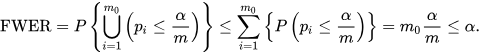

With respect to Family-wise error rate control, the Bonferroni correction can be conservative if there are a large number of tests and/or the test statistics are positively correlated. 

The evaluation metrics a closely related to each other, so that in our case the Beferonni correction would be too conservative for rejecting the null hypothesis.e 

# EDA of Experiment Data

In [9]:
data_control = pd.read_csv(path+"Final Project Results - Control.csv")
data_experiment = pd.read_csv(path+"Final Project Results - Experiment.csv")

display(data_control.head(3))
print(f"- Shape of Control dataset is {data_control.shape}")
print(f"- Shape of Experiment dataset is {data_experiment.shape}")

print(f"- Pageviews for control group = {data_control['Pageviews'].sum()}")
print(f"- Pageviews for experiment group = {data_experiment['Pageviews'].sum()}")
print(f"- Pageviews for both groups = {data_control['Pageviews'].sum()+data_experiment['Pageviews'].sum()}")

df = data_control.copy()
df['Date'] = pd.to_datetime(df['Date'], format="%a, %b %d", errors = 'coerce')
min, max = df['Date'].min(), df['Date'].max()
print(f"- It took {(max - min).days} days to collect the experiment data.")

print(f"- The site diverted {round(690203 / 36 / 40000 * 100,2)}% traffic for the experiment.")

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0


- Shape of Control dataset is (37, 5)
- Shape of Experiment dataset is (37, 5)
- Pageviews for control group = 345543
- Pageviews for experiment group = 344660
- Pageviews for both groups = 690203
- It took 36 days to collect the experiment data.
- The site diverted 47.93% traffic for the experiment.


**Check**: The total pageviews for both group is more than the sample size required = 685,325, calculated in the previous section.

## Check statistical summary of Control vs Experiment groups data

In [10]:
control_summary = data_control.describe().round(3).T
experiment_summary = data_experiment.describe().round(3).T
cols = ["Pageviews","Clicks","Enrollments","Payments"]
for col in cols:
    control_summary.loc[col,"sum"] = data_control[col].sum() 
for col in cols:
    experiment_summary.loc[col,"sum"] = data_experiment[col].sum()
print("Control data summary:"), display(control_summary)
print("Experiment data summary:"), display(experiment_summary)

Control data summary:


,count,mean,std,min,25%,50%,75%,max,sum
Pageviews,37.0,9339.000,740.240,7434.0,8896.0,9420.0,9871.0,10667.0,345543.0
Clicks,37.0,766.973,68.287,632.0,708.0,759.0,825.0,909.0,28378.0
Enrollments,23.0,164.565,29.977,110.0,146.5,162.0,175.0,233.0,3785.0
Payments,23.0,88.391,20.650,56.0,70.0,91.0,102.5,128.0,2033.0


Experiment data summary:


,count,mean,std,min,25%,50%,75%,max,sum
Pageviews,37.0,9315.135,708.071,7664.0,8881.0,9359.0,9737.0,10551.0,344660.0
Clicks,37.0,765.541,64.578,642.0,722.0,770.0,827.0,884.0,28325.0
Enrollments,23.0,148.826,33.234,94.0,127.0,142.0,172.0,213.0,3423.0
Payments,23.0,84.565,23.061,34.0,69.0,91.0,99.0,123.0,1945.0


(None, None)

## Check conversion rates

In [11]:
# Check conversion rates

Percent_Retention_ctrl = data_control["Payments"].sum() / data_control["Enrollments"].sum() * 100
Percent_Retention_expe = data_experiment["Payments"].sum() / data_experiment["Enrollments"].sum() * 100

Percent_NetConversion_ctrl = data_control["Payments"].sum() / data_control[data_control["Payments"]>0]["Clicks"].sum() * 100
Percent_NetConversion_expe = data_experiment["Payments"].sum() / data_experiment[data_experiment["Payments"]>0]["Clicks"].sum() * 100

print(f"""
% Retention in control group = {Percent_Retention_ctrl:.2f}%
% Retention in experiment group = {Percent_Retention_expe:.2f}%
% Diff Retention = {Percent_Retention_expe-Percent_Retention_ctrl:.2f}%
% Net Conversion in control group = {Percent_NetConversion_ctrl:.2f}%
% Net Conversion in experiment group = {Percent_NetConversion_expe:.2f}%
% Diff Net Conversion = {Percent_NetConversion_expe-Percent_NetConversion_ctrl:.2f}%

""")


% Retention in control group = 53.71%
% Retention in experiment group = 56.82%
% Diff Retention = 3.11%
% Net Conversion in control group = 11.76%
% Net Conversion in experiment group = 11.27%
% Diff Net Conversion = -0.49%




# Analyze the Experiment Data

## Sanity Checks
This step is taken after collecting the experiment data to see if each of the invariant metric falls within our expectation. We need to make sure the sanity test passes and debug the problem if it fails for all chosen invariant metrics before diving into further experiment analysis. To do that, we need to calculate the 95% confidence interval for the value expected to observe in the invariant metrics. 

In [12]:
# Calculate the confidence interval for Pageviews
pv_sum_ctrl = data_control["Pageviews"].sum()
pv_sum_expe = data_experiment["Pageviews"].sum()
# We expect each group to account for 50% of the total sample size
p_ctrl, p_expe = 0.5, 0.5
# The standard deviation of a binomial distribution is SD = sqrt(p(1-p)/n)
pv_SD = math.sqrt(p_ctrl*(1-p_ctrl)/(pv_sum_ctrl+pv_sum_expe))
# The margin of error (MOE) for alpha = 0.05 is given by 1.96*SD
pv_MOE = 1.96*pv_SD
# The 95% confidence interval for the value expected
pv_CI_lower, pv_CI_upper = p_ctrl - pv_MOE, p_ctrl + pv_MOE
# The actual observed value
pv_observed = pv_sum_ctrl / (pv_sum_ctrl + pv_sum_expe)

print(f"""
The confidence interval for Pageviews is [{pv_CI_lower:.4f}, {pv_CI_upper:.4f}].
The actual observed value is {pv_observed:.4f}""")
if pv_CI_lower <= pv_observed <= pv_CI_upper:
    print("The observed value falls within expectation. Sanity check PASSED!")
else:
    print("The observed value falls outside of expectation. Sanity check FAILED!")


The confidence interval for Pageviews is [0.4988, 0.5012].
The actual observed value is 0.5006
The observed value falls within expectation. Sanity check PASSED!


In [13]:
# Calculate the confidence interval for Clicks
cl_sum_ctrl = data_control["Clicks"].sum()
cl_sum_expe = data_experiment["Clicks"].sum()
# We expect each group to account for 50% of the total sample size
p_ctrl, p_expe = 0.5, 0.5
# The standard deviation of a binomial distribution is SD = sqrt(p(1-p)/n)
cl_SD = math.sqrt(p_ctrl*(1-p_ctrl)/(cl_sum_ctrl+cl_sum_expe))
# The margin of error (MOE) for alpha = 0.05 is given by 1.96*SD
cl_MOE = 1.96*cl_SD
# The 95% confidence interval for the value expected
cl_CI_lower, cl_CI_upper = p_ctrl - cl_MOE, p_ctrl + cl_MOE
# The actual observed value
cl_observed = cl_sum_ctrl / (cl_sum_ctrl + cl_sum_expe)

print(f"""
The confidence interval for Clicks is [{cl_CI_lower:.4f}, {cl_CI_upper:.4f}].
The actual observed value is {cl_observed:.4f}""")
if cl_CI_lower <= cl_observed <= cl_CI_upper:
    print("The observed value falls within expectation. Sanity check PASSED!")
else:
    print("The observed value falls outside of expectation. Sanity check FAILED!")


The confidence interval for Clicks is [0.4959, 0.5041].
The actual observed value is 0.5005
The observed value falls within expectation. Sanity check PASSED!


Notes:  
- For a count (such as the first three metrics), you should calculate a confidence interval around the fraction of events you expect to be assigned to the control group, and the observed value should be the actual fraction that was assigned to the control group.
- For any other type of metric, (such as the last four metrics), you should construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1 (See Section 19 Pooled Standard Error), then check whether the difference between group values falls within that confidence level.

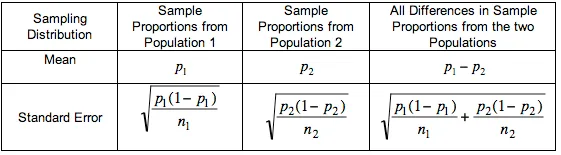

## Effect Size Tests

For each of the evaluation metric, we will compute the confidence interval around the difference (see formula above) and determine whether the data is statisfically significant and/or practically significant.

Recall that Retention is number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)

In [14]:
# Retention = Payments / Enrollments
pay_sum_ctrl = data_control["Payments"].sum()
enr_sum_ctrl = data_control[data_control["Payments"] > 0]["Enrollments"].sum()
pay_sum_expe = data_experiment["Payments"].sum()
enr_sum_expe = data_experiment[data_experiment["Payments"] > 0]["Enrollments"].sum()
p1, n1 = pay_sum_expe/enr_sum_expe, enr_sum_expe
p2, n2 = pay_sum_ctrl/enr_sum_ctrl, enr_sum_ctrl
SD_retention = math.sqrt(p1*(1-p1)/(n1) + p2*(1-p2)/(n2))
"""
Alternative formula for Standard Deviation: 
p_retention = (pay_sum_ctrl+pay_sum_expe)/(enr_sum_ctrl+enr_sum_expe)
SD_retention = math.sqrt(p_retention*(1-p_retention)*(1/enr_sum_ctrl+1/enr_sum_expe))
which will produce a slightly different value than the above.
"""
MOE_retention = 1.96*SD_retention
# The observed difference, d_hat
# d_hat = probability of experiment, p1 - probability of control, p2
d_hat_retention = pay_sum_expe/enr_sum_expe - pay_sum_ctrl/enr_sum_ctrl

msg1 = '(CI does not include 0)'
msg2 = '(CI includes 0)'
msg3 = '(CI does not include dmin)'
msg4 = '(CI includes dmin)'
dmin_retention = 0.01
print(f"""
The standard deviation is {SD_retention:.4f}
The confidence interval is [{d_hat_retention-MOE_retention:.4f}, {d_hat_retention+MOE_retention:.4f}]
The observed difference, p1 - p2 is {d_hat_retention:.4f}
Statistically significant: {(d_hat_retention-MOE_retention)>0 and 
                            (d_hat_retention+MOE_retention)>0} {msg1 
                            if ((d_hat_retention-MOE_retention)>0 and 
                                (d_hat_retention+MOE_retention)>0
                               ) 
                            else msg2}
Practically significant: {(d_hat_retention-MOE_retention)>dmin_retention and 
                            (d_hat_retention+MOE_retention)<dmin_retention} {msg3 
                            if ((d_hat_retention-MOE_retention)>dmin_retention and 
                                (d_hat_retention+MOE_retention)<dmin_retention
                               ) 
                            else msg4}
""")


The standard deviation is 0.0117
The confidence interval is [0.0081, 0.0541]
The observed difference, p1 - p2 is 0.0311
Statistically significant: True (CI does not include 0)
Practically significant: False (CI includes dmin)



Recall that Net conversion is the number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" (dmin=0.0075). 

Note that the Payments stops before the experiment ends. So the Clicks count was recorded up till the end of experiment date but the Payments sum does not, hence the condition in the sum formula for the denominator, Clicks.

In [15]:
# Net conversion = Payments / Clicks
pay_sum_ctrl = data_control["Payments"].sum()
cli_sum_ctrl = data_control[data_control["Payments"] > 0]["Clicks"].sum()
pay_sum_expe = data_experiment["Payments"].sum()
cli_sum_expe = data_experiment[data_experiment["Payments"] > 0]["Clicks"].sum()
p1, n1 = pay_sum_expe/cli_sum_expe, cli_sum_expe
p2, n2 = pay_sum_ctrl/cli_sum_ctrl, cli_sum_ctrl
SD_netconv = math.sqrt(p1*(1-p1)/(n1) + p2*(1-p2)/(n2))
"""
Alternative formula for Standard Deviation: 
p_netconv = (pay_sum_ctrl+pay_sum_expe)/(cli_sum_ctrl+cli_sum_expe)
SD_netconv = math.sqrt(p_netconv*(1-p_netconv)*(1/cli_sum_ctrl+1/cli_sum_expe))
which will produce a slightly different value than the above.
"""
MOE_netconv = 1.96*SD_netconv
# The observed difference, d_hat
# d_hat = probability of experiment, p1 - probability of control, p2
d_hat_netconv = pay_sum_expe/cli_sum_expe - pay_sum_ctrl/cli_sum_ctrl

msg1 = '(CI does not include 0)'
msg2 = '(CI includes 0)'
msg3 = '(CI does not include dmin)'
msg4 = '(CI includes dmin)'
dmin_netconv = 0.0075
print(f"""
The standard deviation is {SD_netconv:.4f}
The confidence interval is [{d_hat_netconv-MOE_netconv:.4f}, {d_hat_netconv+MOE_netconv:.4f}]
The observed difference, p1 - p2 is {d_hat_netconv:.4f}
Statistically significant: {(d_hat_netconv-MOE_netconv)>0 and 
                            (d_hat_netconv+MOE_netconv)>0} {msg1 
                            if ((d_hat_netconv-MOE_netconv)>0 and 
                                (d_hat_netconv+MOE_netconv)>0
                               ) 
                            else msg2}
Practically significant: {(d_hat_netconv-MOE_netconv)>dmin_netconv and 
                            (d_hat_netconv+MOE_netconv)<dmin_netconv} {msg3 
                            if ((d_hat_netconv-MOE_netconv)>dmin_netconv and 
                                (d_hat_netconv+MOE_netconv)<dmin_netconv
                               ) 
                            else msg4}
""")


The standard deviation is 0.0034
The confidence interval is [-0.0116, 0.0019]
The observed difference, p1 - p2 is -0.0049
Statistically significant: False (CI includes 0)
Practically significant: False (CI includes dmin)



From the effective size tests above, the following can be concluded:  
- Retention metric is statistically significant but practically insignificant
- Net conversion metric is both statistically and practically insignificant.

## Sign Tests
The sign test is a special case of the binomial case where your theory is that the two outcomes have equal probabilities.


In [16]:
from scipy.stats import binom_test 
alpha = 0.05

In [17]:
# Calculate the Retention for each day
data_control["Retention"] = data_control["Payments"]/data_control["Enrollments"]
data_experiment["Retention"] = data_experiment["Payments"]/data_experiment["Enrollments"]
# Calculate the number of cases where Experiment > Control
retention_diff_byday = sum(data_exp > data_cont for data_exp, data_cont \
                           in zip(data_experiment["Retention"], \
                                  data_control["Retention"]))
# Calculate the number of experiment days
days = len(data_control[data_control["Payments"]>0]["Date"])
# Calculate the probability of Retention where Experiment group > Control group
p_value_retention = binom_test(retention_diff_byday, days, p=0.5)
print(f"For Retention: p-value: {p_value_retention:.4f}, Statistically Significant: {p_value_retention>(1-alpha)}")


For Retention: p-value: 0.6776, Statistically Significant: False


In [18]:
# Calculate the Net conversion for each day
data_control["Net conversion"] = data_control["Payments"]/data_control["Clicks"]
data_experiment["Net conversion"] = data_experiment["Payments"]/data_experiment["Clicks"]
# Calculate the number of cases where Experiment > Control
Netconversion_diff_byday = sum(data_exp > data_cont for data_exp, data_cont \
                           in zip(data_experiment["Net conversion"], \
                                  data_control["Net conversion"]))
# Calculate the number of experiment days
days = len(data_control[data_control["Payments"]>0]["Date"])
# Calculate the probability of Net conversion where Experiment group > Control group
p_value_Netconversion = binom_test(Netconversion_diff_byday, days, p=0.5)
print(f"For Net Conversion: p-value: {p_value_Netconversion:.4f}, Statistically Significant: {p_value_Netconversion>(1-alpha)}")


For Net Conversion: p-value: 0.6776, Statistically Significant: False


From the sign tests above, the following can be concluded:
- Retention metric is statistically insignificant
- Net conversion metric is statistically insignificant

Interestingly, the results are different between Effective Size Test and Sign Test for Retention metric. This indicates that the criteria for significance or the underlying assumptions are distinct. It suggests that the two statistical tests are capturing different aspects of the data or analyzing different hypotheses.

# Conclusion
The experiment is designed to test if the "free trial screener" will help to filter out users who will not commit to > 5hr of study time, while not reducing the number of paid users after completing the free trials. 

The Retention metric is dropped for evaluation as the number of samples required is not achieved in this experiment as the experiement time required is more than 3 months. This is okay since the two evaluation metrics are closely related.

From the EDA, retention rises by 3.11% while the net conversion falls by -0.49%. Since retention metric cannot be used for evaluation for the reason stated above, by looking at only net conversion, the "free trial screener" actually decreases the users tendency to continue the subscription after free trial. 

7%
Looking only at Net conversion metric, both Effective Size Test and Sign Test concluded that the evaluation metric is statistically insignificant. Hence the Null Hypothesis, H0 will not be rejectenIn summary, i

It is not recommended to add the "free trial screener" page.